## Добавление в регрессионную модель дополнительных признаков

1. Загрузите обучающие выборки прошлой недели, перечислите используемые в моделях признаки и посчитайте качество прогнозов моделей, настроенных на данных до апреля 2016, в мае 2016.

На примере выбранного региона рассмотрим обучающую выборку с прошлой недели, посчитаем качество проноза

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (15,8)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error as MAE

In [2]:
data_agg4 = pd.read_csv('taxi_apr_2016.csv')
data_agg5 = pd.read_csv('taxi_may_2016.csv')

In [3]:
data_1128_train = data_agg4.loc[data_agg4['region']==1128].drop(columns='region').set_index('tpep_pickup_datetime')
data_1128_test= data_agg5.loc[data_agg5['region']==1128].drop(columns='region').set_index('tpep_pickup_datetime')

In [4]:
data_1128_train

,trips_number
tpep_pickup_datetime,
2016-04-01 00,603
2016-04-01 01,436
2016-04-01 02,299
2016-04-01 03,164
2016-04-01 04,129
...,...
2016-04-30 19,724
2016-04-30 20,733
2016-04-30 21,875


In [5]:
def add_fourier_features(data_region):
    m = 169
    n = len(data_region)
    for i in range(1, m):
        sin = "sin_" + str(i)
        cos = "cos_" + str(i)
        data_region[sin] = np.sin(2*np.pi*i*np.arange(1, n+1)/168.0)
        data_region[cos] = np.cos(2*np.pi*i*np.arange(1, n+1)/168.0)
    return data_region

In [6]:
data_1128_train = add_fourier_features(data_1128_train)
data_1128_test = add_fourier_features(data_1128_test)

In [7]:
data_1128_train.head()

,trips_number,sin_1,cos_1,sin_2,cos_2,sin_3,cos_3,sin_4,cos_4,sin_5,...,sin_164,cos_164,sin_165,cos_165,sin_166,cos_166,sin_167,cos_167,sin_168,cos_168
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2016-04-01 00,603,0.037391,0.999301,0.074730,0.997204,0.111964,0.993712,0.149042,0.988831,0.185912,...,-0.149042,0.988831,-0.111964,0.993712,-0.074730,0.997204,-0.037391,0.999301,-2.449294e-16,1.0
2016-04-01 01,436,0.074730,0.997204,0.149042,0.988831,0.222521,0.974928,0.294755,0.955573,0.365341,...,-0.294755,0.955573,-0.222521,0.974928,-0.149042,0.988831,-0.074730,0.997204,-4.898587e-16,1.0
2016-04-01 02,299,0.111964,0.993712,0.222521,0.974928,0.330279,0.943883,0.433884,0.900969,0.532032,...,-0.433884,0.900969,-0.330279,0.943883,-0.222521,0.974928,-0.111964,0.993712,-7.347881e-16,1.0
2016-04-01 03,164,0.149042,0.988831,0.294755,0.955573,0.433884,0.900969,0.563320,0.826239,0.680173,...,-0.563320,0.826239,-0.433884,0.900969,-0.294755,0.955573,-0.149042,0.988831,-9.797174e-16,1.0
2016-04-01 04,129,0.185912,0.982566,0.365341,0.930874,0.532032,0.846724,0.680173,0.733052,0.804598,...,-0.680173,0.733052,-0.532032,0.846724,-0.365341,0.930874,-0.185912,0.982566,-1.224647e-15,1.0


Добавим ещё некоторые экзогенные признаки: день недели и час

In [8]:
def add_exog_features(data_region):
    df = data_region.reset_index()
    df['day'] = (pd.to_datetime(df['tpep_pickup_datetime'])).dt.dayofweek
    df['hour'] =(pd.to_datetime(df['tpep_pickup_datetime'])).dt.hour
    return df.set_index('tpep_pickup_datetime')

In [9]:
data_1128_train = add_exog_features(data_1128_train)
data_1128_test = add_exog_features(data_1128_test)

In [10]:
data_1128_train.head()

,trips_number,sin_1,cos_1,sin_2,cos_2,sin_3,cos_3,sin_4,cos_4,sin_5,...,sin_165,cos_165,sin_166,cos_166,sin_167,cos_167,sin_168,cos_168,day,hour
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2016-04-01 00,603,0.037391,0.999301,0.074730,0.997204,0.111964,0.993712,0.149042,0.988831,0.185912,...,-0.111964,0.993712,-0.074730,0.997204,-0.037391,0.999301,-2.449294e-16,1.0,4,0
2016-04-01 01,436,0.074730,0.997204,0.149042,0.988831,0.222521,0.974928,0.294755,0.955573,0.365341,...,-0.222521,0.974928,-0.149042,0.988831,-0.074730,0.997204,-4.898587e-16,1.0,4,1
2016-04-01 02,299,0.111964,0.993712,0.222521,0.974928,0.330279,0.943883,0.433884,0.900969,0.532032,...,-0.330279,0.943883,-0.222521,0.974928,-0.111964,0.993712,-7.347881e-16,1.0,4,2
2016-04-01 03,164,0.149042,0.988831,0.294755,0.955573,0.433884,0.900969,0.563320,0.826239,0.680173,...,-0.433884,0.900969,-0.294755,0.955573,-0.149042,0.988831,-9.797174e-16,1.0,4,3
2016-04-01 04,129,0.185912,0.982566,0.365341,0.930874,0.532032,0.846724,0.680173,0.733052,0.804598,...,-0.532032,0.846724,-0.365341,0.930874,-0.185912,0.982566,-1.224647e-15,1.0,4,4


In [11]:
X_train = data_1128_train.drop(columns='trips_number').fillna(0)
y_train = data_1128_train['trips_number'].fillna(0)

In [12]:
X_test = data_1128_test.drop(columns='trips_number').fillna(0)
y_test = data_1128_test['trips_number'].fillna(0)

In [13]:
model = Lasso(alpha=0.5)
model.fit(X_train, y_train)

Lasso(alpha=0.5)

In [14]:
prediction = model.predict(X_train)
prediction_test = model.predict(X_test)

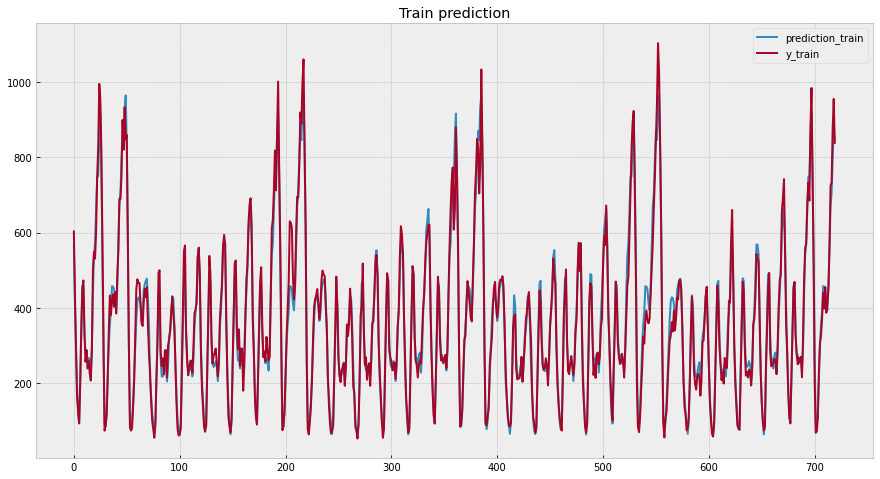

In [15]:
plt.plot(prediction, label='prediction_train')
plt.plot(y_train.values, label='y_train')
plt.title('Train prediction')
plt.legend()
plt.show()

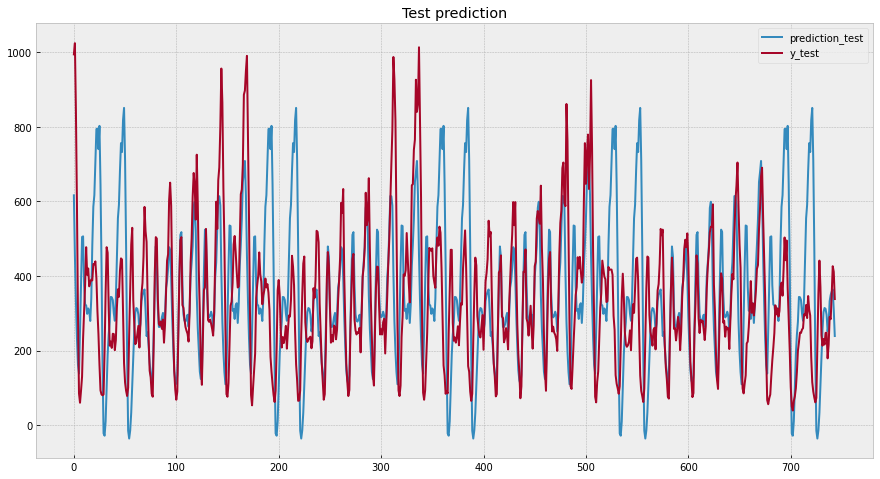

In [16]:
plt.plot(prediction_test, label='prediction_test')
plt.plot(y_test.values, label='y_test')
plt.title('Test prediction')
plt.legend()
plt.show()

In [17]:
MAE(y_test, prediction_test)

146.05110066431055

2. Попробуйте добавить признаки. Используйте идеи, которые мы предложили, или какие-то свои. Обучайте обновлённые модели на данных до апреля 2016 включительно и считайте качество новых прогнозов на мае. Удаётся ли вам улучшить качество? Не нужно ли увеличить сложность регрессионной модели? Если добавляемый признак не улучшает качество, всё равно оставьте доказательства этому в ноутбуке, чтобы ваши коллеги это видели при проверке. 

Предложенные варианты новых признаков:
* средняя длительность поездок
* среднее количество пассажиров
* среднее расстояние по счетчику
* средняя стоимость поездок
* доли провайдеров данных

На этапе предобработки данных сформируем дополнительные признаки с помощью следующей конструкции:

```python
taxi_agg = taxi_new.groupby(['tpep_pickup_datetime','region'],as_index=False).agg({'trips_number':'count',
                                                                                   'passenger_count':'sum',
                                                                                   'trip_distance':'mean',
                                                                                   'fare_amount':'sum',
                                                                                   'extra':'mean'}) 
```

Используемые варианты новых признаков:
- passenger_count - суммарное количество преревезенных пассажиров
- trip_distance - среднее расстояние по счетчику
- fare_amount - суммарная стоимость поездок
- extra - средняя доплата за поездки в час пик и ночное время


In [18]:
data_new_agg4 = pd.read_csv('taxi_apr_new_2016.csv')
data_new_agg5 = pd.read_csv('taxi_may_new_2016.csv')

In [19]:
data_new_agg4.head()

,tpep_pickup_datetime,region,trips_number,passenger_count,trip_distance,fare_amount,extra
0,2016-04-01 00,392,1,1,12.900000,60.0,0.000000
1,2016-04-01 00,926,1,2,1.160000,60.0,0.000000
2,2016-04-01 00,1067,1,1,1.250000,7.0,0.500000
3,2016-04-01 00,1074,46,75,5.427826,867.5,0.500000
4,2016-04-01 00,1075,55,78,4.552364,935.0,0.481818


In [20]:
new_features_train = data_new_agg4.loc[data_new_agg4['region']==1128]
new_features_test = data_new_agg5.loc[data_new_agg5['region']==1128]
new_features_train.head()

,tpep_pickup_datetime,region,trips_number,passenger_count,trip_distance,fare_amount,extra
12,2016-04-01 00,1128,603,1053,2.990813,7472.01,0.496683
216,2016-04-01 01,1128,436,707,3.129656,5451.00,0.496560
453,2016-04-01 02,1128,299,502,3.351171,3847.00,0.496656
626,2016-04-01 03,1128,164,303,3.624085,2205.50,0.496951
797,2016-04-01 04,1128,129,236,4.432093,2018.00,0.480620


In [21]:
features_name = ['passenger_count', 'trip_distance', 'fare_amount', 'extra']

In [22]:
new_features_train[features_name].values

array([[1.05300000e+03, 2.99081260e+00, 7.47201000e+03, 4.96683250e-01],
       [7.07000000e+02, 3.12965596e+00, 5.45100000e+03, 4.96559633e-01],
       [5.02000000e+02, 3.35117057e+00, 3.84700000e+03, 4.96655518e-01],
       ...,
       [1.56600000e+03, 2.25650286e+00, 9.96900000e+03, 4.99428571e-01],
       [1.69300000e+03, 2.48404188e+00, 1.16320000e+04, 4.99476440e-01],
       [1.44800000e+03, 2.54655131e+00, 1.04130000e+04, 4.97016706e-01]])

In [23]:
X_train[features_name] = new_features_train[features_name].values
X_test[features_name] = new_features_test[features_name].values

In [24]:
model = Lasso(alpha=0.5)
model.fit(X_train, y_train)

Lasso(alpha=0.5)

In [25]:
prediction = model.predict(X_train)
prediction_test = model.predict(X_test)

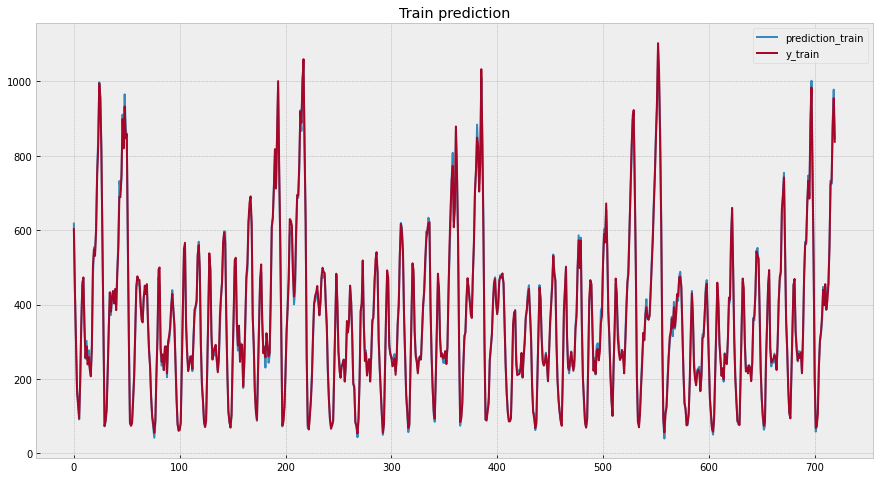

In [26]:
plt.plot(prediction, label='prediction_train')
plt.plot(y_train.values, label='y_train')
plt.title('Train prediction')
plt.legend()
plt.show()

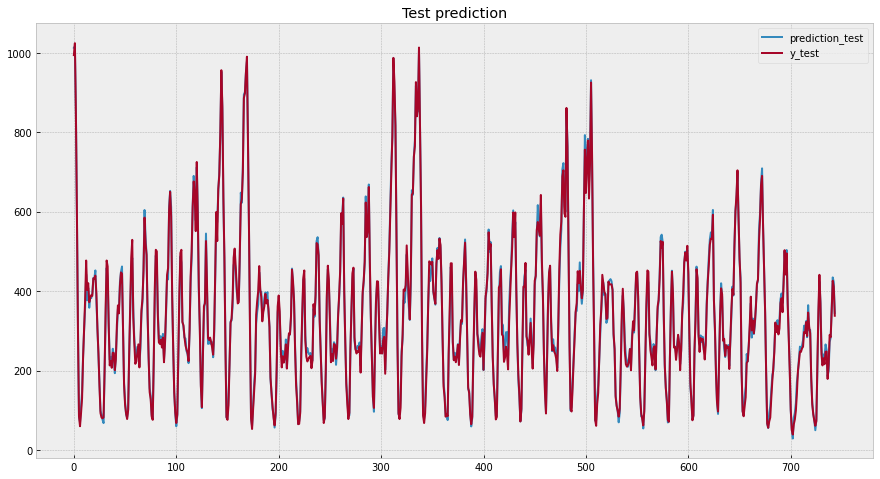

In [27]:
plt.plot(prediction_test, label='prediction_test')
plt.plot(y_test.values, label='y_test')
plt.title('Test prediction')
plt.legend()
plt.show()

In [28]:
MAE(y_test, prediction_test)

10.67396092054197

Таким образом, при добавлении дополнительных признаков качество модели значительно улучшилось

3. Когда вы примете решение остановиться и перестать добавлять признаки, постройте для каждой географической зоны и каждого конца истории от 2016.04.30 23:00 до 2016.05.31 17:00 прогнозы на 6 часов вперёд; посчитайте в ноутбуке ошибку прогноза по следующему функционалу: 

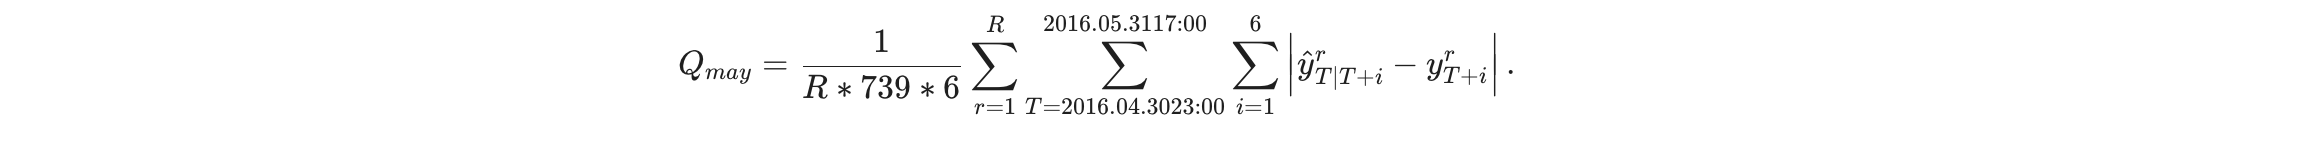

Используем подготовленный датафрейм с новыми признаками для всех регионов для построения прогноза по каждой географической зоне

In [29]:
data = pd.read_csv('data_all_regions.csv')

In [30]:
regions = data['region'].unique()

In [34]:
R = 79
H = 6
denom = 1.0/(R*H*6)
Q = 0
predictions = []

for region in regions:
    
    data_train = data.loc[(data['region']==region)&
                          (data['tpep_pickup_datetime']<='2016-05-31 17:00:00')
                         ].drop(columns='region').set_index('tpep_pickup_datetime')
    
    data_test = data.loc[(data['region']==region)&
                         (data['tpep_pickup_datetime']> '2016-05-31 17:00:00')
                        ].drop(columns='region').set_index('tpep_pickup_datetime')
    
    X_train = data_train.drop(columns='trips_number').fillna(0)
    y_train = data_train['trips_number'].fillna(0)
    X_test = data_test.drop(columns='trips_number').fillna(0)
    y_test = data_test['trips_number'].fillna(0)
    
    # отбираем регионы, по которым достаточно наблюдений    
    if len(X_train)>1400:
        model = Lasso(alpha=0.5)
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)    
        res = denom*MAE(y_test, prediction)
        Q += res
        predictions.append(prediction)
print(Q)

20.17506572065677


4. Переобучите итоговые модели на данных до мая 2016 включительно, постройте прогнозы на июнь для каждого конца истории от 2016.05.31 23:00 до 2016.06.30 17:00 и запишите все результаты в один файл в уже знакомом вам формате: geoID, histEndDay, histEndHour, step, y

In [ ]:
R = 102
H = 715
denom = 1.0/(R*H*6)
Q_june = 0
predictions = []

for region in regions:
    
    data_train = data.loc[data['region']==region].drop(columns='region').set_index('tpep_pickup_datetime')
    data_test = data_june.loc[(data_june['region']==region)&
                             (data_june['tpep_pickup_datetime'<= '2016-06-30 17'])
                             ].drop(columns='region').set_index('tpep_pickup_datetime')
    
    X_train = data_train.drop(columns='trips_number').fillna(0)
    y_train = data_train['trips_number'].fillna(0)
    X_test = data_test.drop(columns='trips_number').fillna(0)
    
    model = Lasso(alpha=0.5)
    model.fit(X_train, y_train)
    prediction = model.predict(X_june)    
    res = denom*MAE(y_test, prediction_test)
    
    Q_june += res
    predictions.append(prediction)
print(Q_june)

5. Загрузите полученный файл на kaggle: https://inclass.kaggle.com/c/yellowtaxi. Добавьте в ноутбук ссылку на сабмишн.